# Ejercicio en clase

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import corner

np.random.seed(4)

1.- Usa tu código de metropolis para encontrar la pendiente y ordenada al órigen del conjunto de datos en el archivo fit_excercise.npy. El archivo son 3 arreglos que corresponden a x,y,yerror.

In [3]:
file = np.load('fit_ejercise.npy')

In [7]:
x = file[0]
y = file[1]
yerror = file[2]

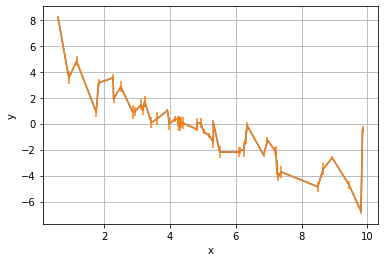

In [11]:
plt.plot(x, y)
plt.errorbar(x, y,yerr = yerror, markersize = 0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.grid('True')

In [12]:
def function(x0, a0, b0):
    return a0*x0 + b0

def likelihood(a, b, data):
    equis = data[0]
    ye = data[1]
    yerr = data[2] 
    model = function(equis, a, b)
    likelihood_0 = (ye-model)**2/(yerr**2)
    return likelihood_0.sum()

In [22]:
rango = 3000

a0 = -3
b0 = 4
lnlike0 = -1*likelihood(a0, b0, [x,y,yerror])

a_sample = [a0]
b_sample = [b0]

sigma = 0.01

for j in range(1,rango):
    a_new = np.random.normal(a_sample[len(a_sample)-1], sigma)
    b_new = np.random.normal(b_sample[len(a_sample)-1], sigma)
    like = -1*likelihood(a_new, b_new, [x,y,yerror])
    if like>lnlike0:
        lnlike0 = like
        a_sample.append(a_new)
        b_sample.append(b_new)
    elif lnlike0-like<-math.log(random.uniform(0,1)):
        lnlike0 = like
        a_sample.append(a_new)
        b_sample.append(b_new)

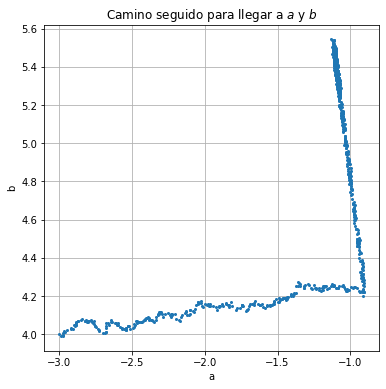

In [23]:
plt.figure(figsize = (6,6))
plt.plot(a_sample,b_sample, 'o', markersize = 2)
plt.xlabel('a')
plt.ylabel('b')
plt.title('Camino seguido para llegar a $a$ y $b$')
plt.grid('True')

In [25]:
len(a_sample)

1409

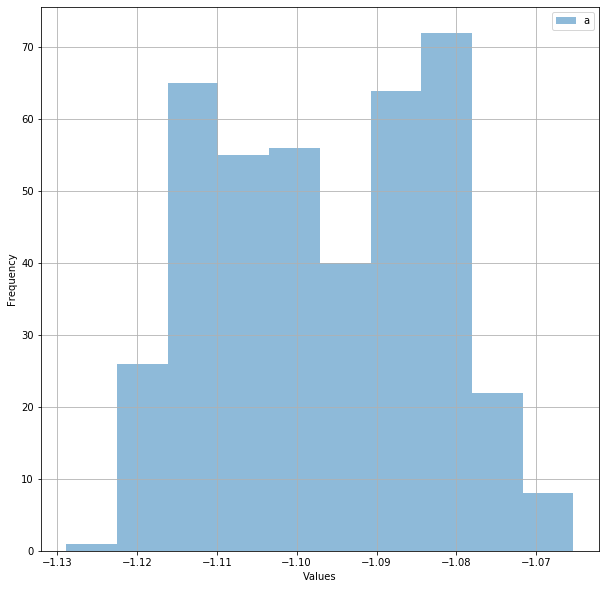

In [26]:
plt.figure(figsize = (10,10))
plt.hist(a_sample[1000: 2000], label = 'a',alpha=0.5);
plt.grid('True')
plt.xlabel('Values')
plt.legend()
plt.ylabel('Frequency');

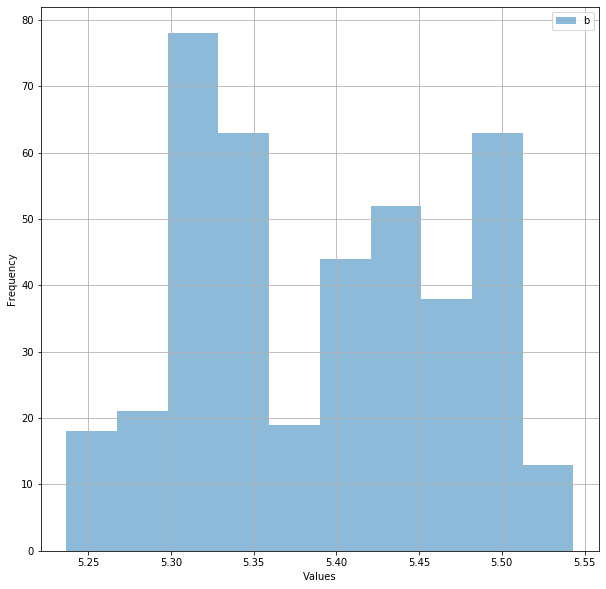

In [27]:
plt.figure(figsize = (10,10))
plt.hist(b_sample[1000: 2000], label = 'b',alpha=0.5);
plt.grid('True')
plt.xlabel('Values')
plt.legend()
plt.ylabel('Frequency');

2.-Grafica tu modelo contra los datos. ¿Qué tan bueno es el ajuste? ¿Cualitativamente? ¿Cuantitativamente?

Calculamos la mediana.

In [38]:
a_great = np.median(np.array(a_sample))
a_great

-1.0932933891960483

In [39]:
b_great = np.median(np.array(b_sample))
b_great

5.316791245657933

In [41]:
x_new = np.linspace(0,10,100)
y_new = a_great*x_new + b_great

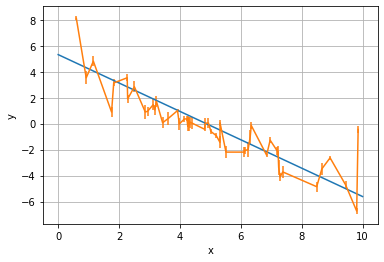

In [42]:
plt.plot(x_new, y_new)
plt.errorbar(x, y,yerr = yerror, markersize = 0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.grid('True')

**Cualitativamente**: Se observa que se ajusta a los datos, ya que la pendiente y la ordenada hacen que la recta esté entre los datos. 

**Cuantitativamente**: ¿Cómo podemos expresar qué tan bien se ajustan nuestros datos a la recta?
